In [ ]:
# This code tests if I can plot rays in the domain of a problem
# I am not going to consider edge cases for theta = 0 or theta = pi/2
import shapely
import shapely.plotting
import matplotlib.pyplot as plt
import numpy as np

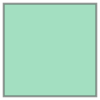

In [29]:
x_min = 0
x_max = 10
y_min = 0
y_max = 10

problem_domain = shapely.geometry.box(x_min, y_min, x_max, y_max)
problem_domain

(<matplotlib.patches.PathPatch at 0x2ab8051fb90>,
 <matplotlib.lines.Line2D at 0x2ab8056ec00>)

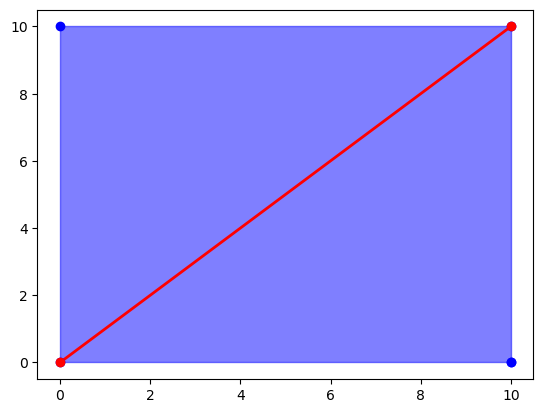

In [30]:
fig, ax = plt.subplots()
# ax.plot(*problem_domain.exterior.xy, color='blue', linewidth=2, label='Problem Domain')
shapely.plotting.plot_polygon(
    problem_domain, ax=ax, color="blue", alpha=0.5, label="Problem Domain"
)

test_ray = shapely.geometry.LineString([(0, 0), (10, 10)])
shapely.plotting.plot_line(
    test_ray, ax=ax, color="red", linewidth=2, label="Test Ray"
)

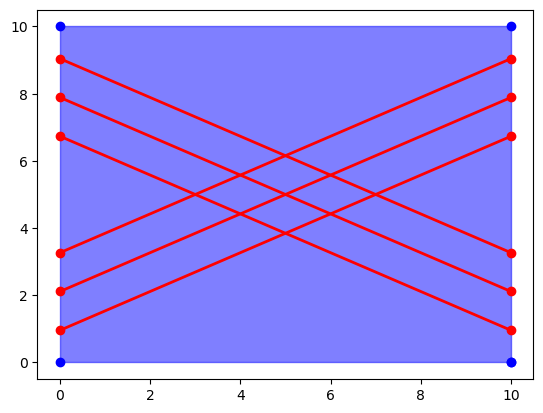

In [ ]:
ray_width = 0.1

angle = np.pi / 6
# angle = np.pi / 4

def generate_ray(offset_from_center, line_angle, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max):
    """Generates a ray an angle `line_angle` that is offset by `offset_from_center` from the center of the problem domain
    in the direction perpendicular to the line angle.
    The ray is bounded by the problem domain.
    Theta is in radians and counterclockwise from the x-axis.
    """
    sin_theta = np.sin(line_angle)
    cos_theta = np.cos(line_angle)
    tan_theta = sin_theta / cos_theta
    
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    # technically not the offset but just a point on the ray we are generating
    x_offset = x_center + offset_from_center * sin_theta
    y_offset = y_center - offset_from_center * cos_theta
    
    # point intercept form, slope is tan(theta)
    y_of_x = lambda x : tan_theta * (x - x_offset) + y_offset
    x_of_y = lambda y : (y - y_offset) / tan_theta + x_offset
    
    # edge case where ray intersects corners of the problem domain
    if np.abs(x_max - x_min) == np.abs(y_max - y_min) and np.abs(line_angle) == np.pi / 4 and offset_from_center == 0:
        if line_angle > 0:
            return shapely.geometry.LineString([(x_min, y_min), (x_max, y_max)])
        else:
            return shapely.geometry.LineString([(x_min, y_max), (x_max, y_min)])
        
    # Calculate the intersection points with the problem domain boundaries
    points = []
    y_of_x_min = y_of_x(x_min)
    if y_min <= y_of_x_min <= y_max:
        points.append((x_min, y_of_x_min))
    
    y_of_x_max = y_of_x(x_max)
    if y_min <= y_of_x_max <= y_max:
        points.append((x_max, y_of_x_max))
    
    x_of_y_min = x_of_y(y_min)
    if x_min <= x_of_y_min <= x_max:
        points.append((x_of_y_min, y_min))
        
    x_of_y_max = x_of_y(y_max)
    if x_min <= x_of_y_max <= x_max:
        points.append((x_of_y_max, y_max))

    if len(points) == 0:
        return None

    assert len(points) == 2, f"Ray does not intersect the problem domain twice. It does {len(points)} times. Points: {points}"
    
    # Create a line string representing the ray
    ray = shapely.geometry.LineString(points)

    return ray

ray0 = generate_ray(0, angle)
ray1 = generate_ray(-1, angle)
ray3 = generate_ray(1, angle)

ray4 = generate_ray(0, -angle)
ray5 = generate_ray(-1, -angle)
ray6 = generate_ray(1, -angle)

ray7 = generate_ray(100, angle)
assert ray7 is None, f"Ray should not intersect the problem domain."

fig, ax = plt.subplots()
# ax.plot(*problem_domain.exterior.xy, color='blue', linewidth=2, label='Problem Domain')
shapely.plotting.plot_polygon(
    problem_domain, ax=ax, color="blue", alpha=0.5, label="Problem Domain"
)

for ray in [ray0, ray1, ray3, ray4, ray5, ray6]:
    # ax.plot(*ray.xy, color='red', linewidth=2, label='Test Ray')
    shapely.plotting.plot_line(
        ray, ax=ax, color="red", linewidth=2, label="Test Ray"
    )